In [192]:
%matplotlib inline

In [150]:
## WeatherPy
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [152]:
x = [1,2,3]
x[0] = 5
x

[5, 2, 3]

In [153]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [154]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [155]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url= f"{url}appid={weather_api_key}&units={cities}&q="

    city_url = url + "&q=" + city.replace(" ","+")
    
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | kismayo
Processing Record 5 of Set 1 | bireun
Processing Record 6 of Set 1 | almaznyy
Processing Record 7 of Set 1 | natal
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | saint-leu
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | santa cruz del sur
Processing Record 18 of Set 1 | mugur-aksy
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record

Processing Record 36 of Set 4 | sola
Processing Record 37 of Set 4 | belyy yar
Processing Record 38 of Set 4 | flin flon
Processing Record 39 of Set 4 | bluff
Processing Record 40 of Set 4 | telde
Processing Record 41 of Set 4 | ndungu
Processing Record 42 of Set 4 | urumqi
Processing Record 43 of Set 4 | orlik
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | praia
Processing Record 46 of Set 4 | bosaso
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | atar
Processing Record 0 of Set 5 | marhaura
Processing Record 1 of Set 5 | dongsheng
Processing Record 2 of Set 5 | gimli
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | carauari
Processing Record 5 of Set 5 | shenzhen
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | moron
Processing Record 9 of Set 5 | shelopugino


Processing Record 29 of Set 8 | labrea
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | vestmanna
Processing Record 32 of Set 8 | izyum
Processing Record 33 of Set 8 | bambanglipuro
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | wattegama
Processing Record 36 of Set 8 | sijunjung
Processing Record 37 of Set 8 | kaiyuan
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | saundatti yellamma
City not found. Skipping...
Processing Record 40 of Set 8 | isla mujeres
Processing Record 41 of Set 8 | tame
Processing Record 42 of Set 8 | inongo
Processing Record 43 of Set 8 | ostrovnoy
Processing Record 44 of Set 8 | sorkjosen
Processing Record 45 of Set 8 | beyneu
Processing Record 46 of Set 8 | terney
Processing Record 47 of Set 8 | auchi
Processing Record 48 of Set 8 | maceio
Processing Record 49 of Set 8 | narsaq
Processing Record 0 of Set 9 | macapa
Processing Record 1 of Set 9 | saint-augustin
Processing Record 2

Processing Record 18 of Set 12 | tra vinh
Processing Record 19 of Set 12 | houma
Processing Record 20 of Set 12 | homer
Processing Record 21 of Set 12 | lyubar
Processing Record 22 of Set 12 | mamallapuram
Processing Record 23 of Set 12 | airai
Processing Record 24 of Set 12 | port hawkesbury
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | iwaki
Processing Record 27 of Set 12 | hayden
Processing Record 28 of Set 12 | storsteinnes
Processing Record 29 of Set 12 | henties bay
Processing Record 30 of Set 12 | vasterhaninge
Processing Record 31 of Set 12 | urfa
City not found. Skipping...
Processing Record 32 of Set 12 | barillas
Processing Record 33 of Set 12 | krasnaya gora
Processing Record 34 of Set 12 | maine-soroa
Processing Record 35 of Set 12 | chaumont
Processing Record 36 of Set 12 | mahanoro
Processing Record 37 of Set 12 | udachnyy
Processing Record 38 of Set 12 | nidzica
Processing Record 39 of Set 12 | morehead
Processing Record 40 of Set 12 | belv

In [162]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [163]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,-31.15,98,99,1.47,RU,1677018677
1,port elizabeth,-33.9180,25.5701,15.16,89,0,1.54,ZA,1677018677
2,cape town,-33.9258,18.4232,19.10,68,0,3.13,ZA,1677018509
3,kismayo,-0.3582,42.5454,24.41,82,98,5.72,SO,1677018678
4,bireun,5.2030,96.7009,24.30,84,96,1.87,ID,1677018679


In [164]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [165]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-31.15,98,99,1.47,RU,1677018677
1,port elizabeth,-33.9180,25.5701,15.16,89,0,1.54,ZA,1677018677
2,cape town,-33.9258,18.4232,19.10,68,0,3.13,ZA,1677018509
3,kismayo,-0.3582,42.5454,24.41,82,98,5.72,SO,1677018678
4,bireun,5.2030,96.7009,24.30,84,96,1.87,ID,1677018679


In [166]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

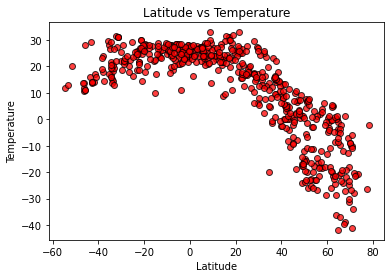

In [193]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, edgecolors="black",facecolors="red")


# Incorporate the other graph properties
# YOUR CODE HERE

(plt.title('Latitude vs Temperature'), plt.xlabel("Latitude"), plt.ylabel("Temperature"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [194]:
#### Latitude Vs. Humidity

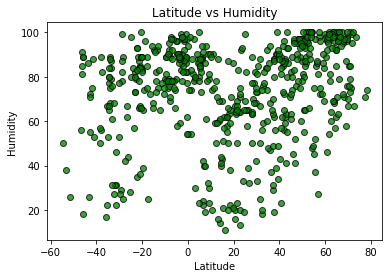

In [195]:
# Build scatter plot for latitude vs. Humidity
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, edgecolors="black",facecolors="green")


# Incorporate the other graph properties
# YOUR CODE HERE

(plt.title('Latitude vs Humidity'), plt.xlabel("Latitude"), plt.ylabel("Humidity"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [196]:
#### Latitude Vs. Cloudiness


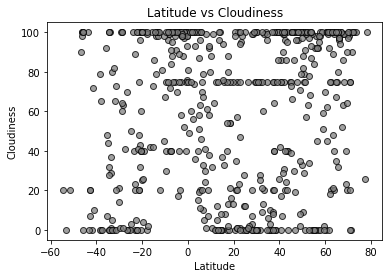

In [197]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, edgecolors="black",facecolors="gray")


# Incorporate the other graph properties
# YOUR CODE HERE

(plt.title('Latitude vs Cloudiness'), plt.xlabel("Latitude"), plt.ylabel("Cloudiness"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [198]:
#### Latitude vs. Wind Speed Plot

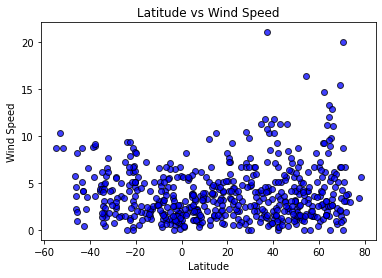

In [199]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, edgecolors="black",facecolors="blue")



# Incorporate the other graph properties
# YOUR CODE HERE

(plt.title('Latitude vs Wind Speed'), plt.xlabel("Latitude"), plt.ylabel("Wind Speed"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [200]:
## Requirement 2: Compute Linear Regression for Each Relationship


In [201]:
# Define a function to create Linear Regression plots
# Per y = mx + b, m == slope, b == intercept, r == r-value
# p == p-value, stderr = standard error

def linear_regression(x,y,x_label,y_label):
    (m, b, r, p, stderr) = linregress(x,y)
    reg_val = (m * x) + b
    reg_equ = f"y={(round(m,4))}x + {(round(b,4))}"

    plt.figure(figsize=(15,10))
    plt.scatter(x,y,color='lightblue',edgecolor='steelblue')
    plt.plot(x,reg_val,color='red')
    plt.annotate(reg_equ,(10,10),color='red',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    print(f"The r-squared value is: {r**2}.")
    plt.show()
# x_values = san_diego_housing['AveRooms']
# y_values = san_diego_housing['MEDV']
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
# plt.show()

In [202]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

north_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-31.15,98,99,1.47,RU,1677018677
4,bireun,5.2030,96.7009,24.30,84,96,1.87,ID,1677018679
5,almaznyy,48.0448,40.0450,0.61,97,96,6.28,RU,1677018680
8,port hardy,50.6996,-127.4199,4.10,65,75,8.75,CA,1677018682
9,provideniya,64.3833,-173.3000,0.20,93,100,12.07,RU,1677018682


In [203]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

south_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,15.16,89,0,1.54,ZA,1677018677
2,cape town,-33.9258,18.4232,19.10,68,0,3.13,ZA,1677018509
3,kismayo,-0.3582,42.5454,24.41,82,98,5.72,SO,1677018678
6,natal,-5.7950,-35.2094,28.36,74,75,4.63,BR,1677018463
7,hermanus,-34.4187,19.2345,16.77,65,0,2.59,ZA,1677018681


In [204]:
###  Temperature vs. Latitude Linear Regression Plot

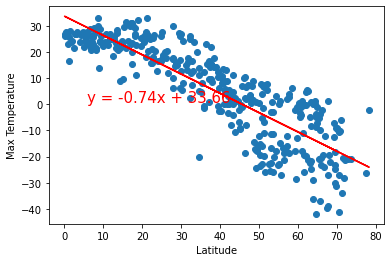

In [205]:
# Linear regression on Northern Hemisphere

x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

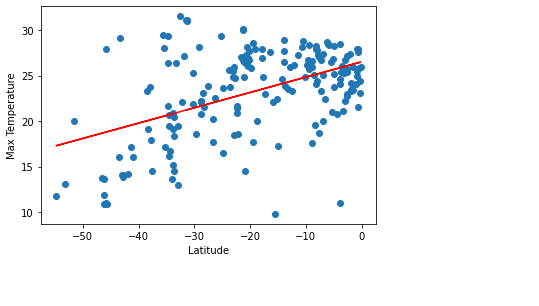

In [206]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()


In [207]:
### Humidity vs. Latitude Linear Regression Plot

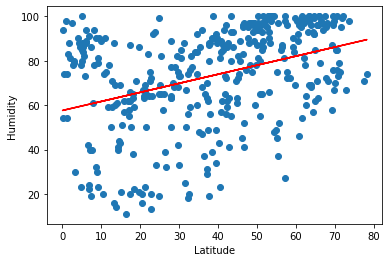

In [208]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

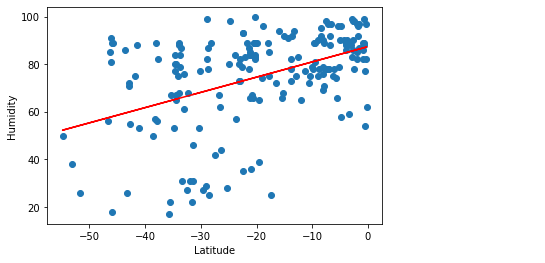

In [209]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [210]:
### Cloudiness vs. Latitude Linear Regression Plot

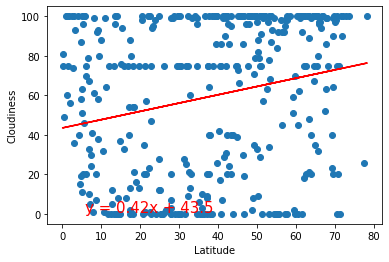

In [211]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

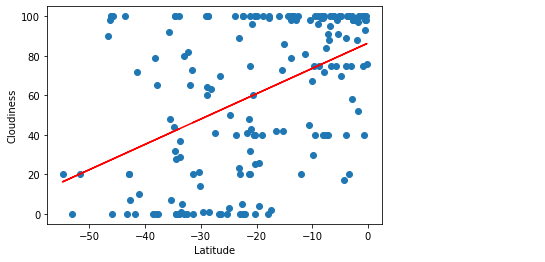

In [212]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [213]:
### Wind Speed vs. Latitude Linear Regression Plot

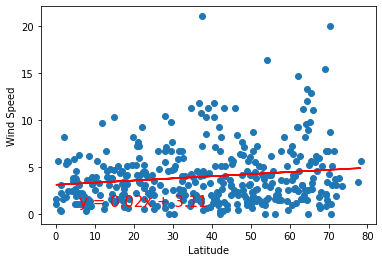

In [216]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

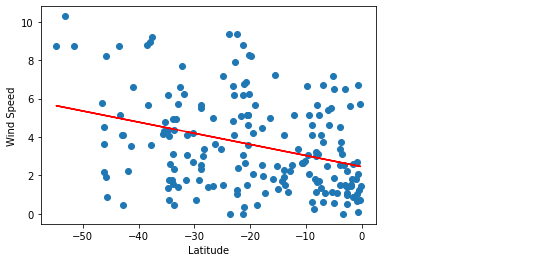

In [217]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()